To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_2020/blob/master/Homeworks/Homework%203.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

# Predicting Churn

You've been authorized to give the retention offer to up to 25% of the customers whose contract is expiring. It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. The historical data includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables.

In [0]:
import numpy as np
import pandas as pd

# Just change the path below so that it points to your file.
data_path = "https://raw.githubusercontent.com/bwolfson2/foster_2020/master/Homeworks/data/data-hw3.csv"

df = pd.read_csv(data_path)


__2. Split the data into 80% training data and 20% test data.__

In [0]:
# Your code goes here

from sklearn.model_selection import train_test_split
df = pd.get_dummies(df, drop_first=True)
target_col = "Churn_Yes"
predictor_cols = df.columns[df.columns != target_col]
# shuffled_data = df.sample(frac=1)
X=df[predictor_cols]
Y=df[target_col]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


__3. Trying out three model types:__
- __A decision tree classifier. 
- __A logistic regression. 
- __KNN Classifier



In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(min_samples_leaf=1)
model.fit(X_train, Y_train)

print ( "Accuracy on training = %.4f" % accuracy_score(model.predict(X_train), Y_train) )

Accuracy on training = 0.9979


In [0]:
step=1
while step <= 5000:
  model = DecisionTreeClassifier(min_samples_leaf=step)
  model.fit(X_train, Y_train)
  scores = cross_val_score(model, X, Y, scoring="accuracy", cv=5)
  print("Min-leave" , step)
  print ( "Accuracy on training = %.4f" % accuracy_score(model.predict(X_train), Y_train) )
  print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))

  step=step*2

Min-leave 1
Accuracy on training = 0.9979
Cross Validated Accuracy: 0.730 +/- 0.008
Min-leave 2
Accuracy on training = 0.9422
Cross Validated Accuracy: 0.741 +/- 0.009
Min-leave 4
Accuracy on training = 0.8946
Cross Validated Accuracy: 0.755 +/- 0.014
Min-leave 8
Accuracy on training = 0.8549
Cross Validated Accuracy: 0.770 +/- 0.008
Min-leave 16
Accuracy on training = 0.8327
Cross Validated Accuracy: 0.781 +/- 0.011
Min-leave 32
Accuracy on training = 0.8144
Cross Validated Accuracy: 0.786 +/- 0.006
Min-leave 64
Accuracy on training = 0.8059
Cross Validated Accuracy: 0.793 +/- 0.007
Min-leave 128
Accuracy on training = 0.8028
Cross Validated Accuracy: 0.790 +/- 0.007
Min-leave 256
Accuracy on training = 0.7893
Cross Validated Accuracy: 0.788 +/- 0.008
Min-leave 512
Accuracy on training = 0.7890
Cross Validated Accuracy: 0.790 +/- 0.008
Min-leave 1024
Accuracy on training = 0.7355
Cross Validated Accuracy: 0.749 +/- 0.018
Min-leave 2048
Accuracy on training = 0.7355
Cross Validated Acc

In [0]:
#Cross Val score for decision tree classifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(model, X, Y, scoring="accuracy", cv=5)

print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))

Cross Validated Accuracy: 0.786 +/- 0.009


In [0]:
#Logistic Regression Model
from sklearn import  linear_model
from sklearn import metrics
print (Y_train)
lin_model = linear_model.LogisticRegression(C=1000000, solver='liblinear')

lin_model.fit(X_train,Y_train)
print ( "Accuracy on training = %.4f" % accuracy_score(lin_model.predict(X_train), Y_train) )

6072    0
2648    0
1445    0
721     1
2461    0
       ..
4917    0
1457    0
4259    1
3075    0
5026    0
Name: Churn_Yes, Length: 5625, dtype: uint8
Accuracy on training = 0.8052


In [0]:
#Changing value of c
for c in range(1,10000,100):
  lin_model = linear_model.LogisticRegression(C=c, solver='liblinear')
  lin_model.fit(X_train,Y_train)
  print ( "Accuracy on training = %.4f" % accuracy_score(lin_model.predict(X_train), Y_train) )

Accuracy on training = 0.8053
Accuracy on training = 0.8053
Accuracy on training = 0.8062
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8064
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8062
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8064
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8064
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8062
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy on training = 0.8052
Accuracy o

In [0]:
target = "Churn_Yes"
avg_auc = cross_val_score(lin_model, df[predictor_cols], df[target_col], cv=10, scoring="roc_auc").mean()
print(avg_auc)

0.8431612265117501


In [0]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train,  Y_train)
print ( "Accuracy on training = %.4f" % accuracy_score(knn.predict(X_train), Y_train) )

Accuracy on training = 0.9977


In [0]:
for n in range(1,500,10): 
  knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
  knn.fit(X_train,  Y_train)
  print ( "Accuracy on training = %.4f" % accuracy_score(knn.predict(X_train), Y_train) )

Accuracy on training = 0.9977
Accuracy on training = 0.8156
Accuracy on training = 0.8080
Accuracy on training = 0.8018
Accuracy on training = 0.7991
Accuracy on training = 0.8002
Accuracy on training = 0.7977
Accuracy on training = 0.7961
Accuracy on training = 0.7961
Accuracy on training = 0.7957
Accuracy on training = 0.7964
Accuracy on training = 0.7956
Accuracy on training = 0.7943
Accuracy on training = 0.7956
Accuracy on training = 0.7945
Accuracy on training = 0.7950
Accuracy on training = 0.7934
Accuracy on training = 0.7920
Accuracy on training = 0.7936
Accuracy on training = 0.7938
Accuracy on training = 0.7936
Accuracy on training = 0.7931
Accuracy on training = 0.7915
Accuracy on training = 0.7918
Accuracy on training = 0.7918
Accuracy on training = 0.7902
Accuracy on training = 0.7899
Accuracy on training = 0.7909
Accuracy on training = 0.7906
Accuracy on training = 0.7904
Accuracy on training = 0.7900
Accuracy on training = 0.7902
Accuracy on training = 0.7915
Accuracy o

In [0]:
# target = "Churn_Yes"
# avg_auc = cross_val_score(knn, df[predictor_cols], df[target_col], cv=10, scoring="roc_auc").mean()
# print(avg_auc)

scores = cross_val_score(knn, X, Y, scoring="accuracy", cv=5)

print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))

Cross Validated Accuracy: 0.788 +/- 0.007


__4.Plotting ROC Curves for test data for selecting best model

Selected Logistic Regression as its giving ROC curve closer to left most corner**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


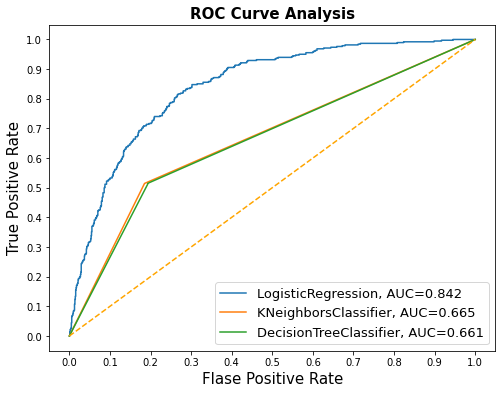

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


classifiers = [ 
              linear_model.LogisticRegression(random_state=1234), 
              KNeighborsClassifier(n_neighbors=1), 
               DecisionTreeClassifier(random_state=1234)]
               
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_test,  yproba)
    auc = roc_auc_score(Y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

__Spliting  training data into two sets, one with 90% of the data (the "sub-training" set) and another with 10% of the data (the validation set). Trained the model and applied it to the validation set, and plotted a profit curve by ranking customers according to their probability of churning.

In [0]:
# Your code goes here
import sklearn.metrics as metrics

X_sub_train, X_sub_test, Y_sub_train, Y_sub_test = train_test_split(X_train, Y_train, test_size=0.1)
# # Make and fit a model on the training data
model_mailing = linear_model.LogisticRegression(C=100)
model_mailing.fit(X_sub_train, Y_sub_train)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
unit_cost=200
unit_revenue = X_sub_train.MonthlyCharges.mean()*12

No handles with labels found to put in legend.


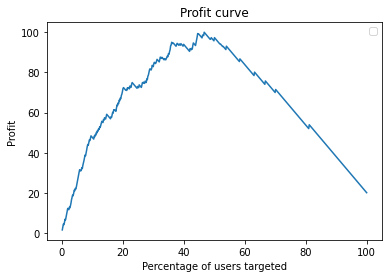

In [0]:

Y_test_probability_1 = model_mailing.predict_proba(X_sub_test)[:, 1]
order = np.argsort(Y_test_probability_1)[::-1]
Y_test_probability_1_sorted = Y_test_probability_1[order]
Y_test_sorted = np.array(Y_sub_test)[order]
X_test_sorted = np.array(X_sub_test)[order]

x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
y_cumulative = np.cumsum(np.multiply(Y_test_sorted,X_test_sorted[:,2])*12 -200)
x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * 1
y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * 1
total_obs = len(Y_sub_train)
total_pos = Y_sub_test.sum()
plt.plot(x_cumulative*100, y_cumulative*100)

plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profit curve")
plt.legend()
    

Another way would be to rank as per profit. 
I followed the following steps - 
1) Get all users with probability > 0.05
2) Rank them on basis of profit they would generate 
3) Select the ones with maximum profit to give retention offer to 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value

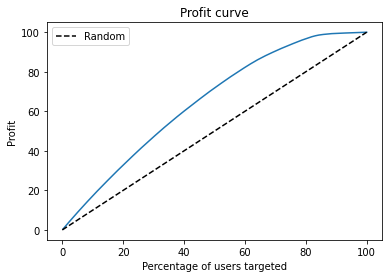

In [0]:
# Your code goes here
# Your code goes here
import sklearn.metrics as metrics

X_sub_train, X_sub_test, Y_sub_train, Y_sub_test = train_test_split(X_train, Y_train, test_size=0.1)
# # Make and fit a model on the training data
model_mailing = linear_model.LogisticRegression(C=100)
model_mailing.fit(X_sub_train, Y_sub_train)

Y_test_probability_2 = model_mailing.predict_proba(X_sub_test)[:, 1]

X_sub_test_profit = X_sub_test

X_sub_test_profit['Probability'] =Y_test_probability_2 

X_sub_test_profit['offer_value'] = X_sub_test_profit.MonthlyCharges * 12 - 200




X_sub_test_profit = X_sub_test_profit[X_sub_test_profit.Probability > 0.05]

Y_test_probability_2 = Y_test_probability_2[Y_test_probability_2>0.05]

X_sub_test_profit= X_sub_test_profit.sort_values(by=['offer_value'],ascending=False)

X_profit= np.array(X_sub_test_profit['offer_value'])

Y_Prob = np.array(X_sub_test_profit['Probability'])    


x_cumulative = np.arange(len(Y_Prob)) + 1
y_cumulative = np.cumsum(X_profit)

x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * 1
y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * 1

plt.plot(x_cumulative*100, y_cumulative*100)
plt.plot([0,100], [0,100], 'k--', label="Random")
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profit curve")
plt.legend()
    